<a href="https://colab.research.google.com/github/mtareqsoliman/msthesis/blob/main/9CCM_10202022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+# Final Report



Importing Data:

In [3]:
import pandas as pd
import numpy as np
import math as math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.gridspec import GridSpec
import scipy.stats as sp
from scipy.optimize import minimize, LinearConstraint
import scipy.optimize as spo
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
from matplotlib import rcParams




In [4]:

NLTHA9 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/9NLTHA_FINAL.xlsx?raw=true',index_col=0)
ecu_9,Vult_9 = np.array(NLTHA9[['ecu']]),np.array(NLTHA9[['Vult']])

ecu_9_mean, ecu_9_std  = -math.exp(np.log(-ecu_9).mean()), np.log(-ecu_9).std()
Vult_9_mean, Vult_9_std = math.exp(np.log(Vult_9).mean()), np.log(Vult_9).std()

ecu_9_alpha = norm.cdf(np.log(-ecu_9), math.log(-ecu_9_mean), ecu_9_std)
ecu_9_alpha = norm.ppf(ecu_9_alpha,0,1)
Vult_9_alpha = norm.cdf(np.log(Vult_9), math.log(Vult_9_mean), Vult_9_std)
Vult_9_alpha = norm.ppf(Vult_9_alpha,0,1)

ecu_9_alpha_mean, ecu_9_alpha_std = np.mean(ecu_9_alpha), np.std(ecu_9_alpha)
Vult_9_alpha_mean,Vult_9_alpha_std = np.mean(Vult_9_alpha), np.std(Vult_9_alpha)

NLTHA9['ecu']=ecu_9_alpha
NLTHA9['Vult']=Vult_9_alpha
NLTHA9.head(10)

,state,IM,record,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
index,,,,,,,,,,
0,1,40,RSN126_GAZLI_GAZ000,-1.599507,0.166228,142.824246,-0.058941,-0.112813,914,0
1,1,40,RSN126_GAZLI_GAZ000,-1.031910,-1.072252,144.838821,-0.026165,-0.099632,906,FAILED
2,1,40,RSN126_GAZLI_GAZ000,-1.031910,1.007293,144.838821,-0.026165,-0.099632,951,FAILED
3,1,40,RSN126_GAZLI_GAZ000,0.034076,-1.687777,150.235062,-0.058990,-0.126897,855,0
4,1,40,RSN126_GAZLI_GAZ000,0.034076,0.166228,150.235062,-0.058990,-0.126897,956,0
5,1,40,RSN126_GAZLI_GAZ000,0.034076,1.319009,150.235062,-0.058990,-0.126897,956,0
6,1,40,RSN126_GAZLI_GAZ000,1.070645,-1.072252,160.453794,-0.006370,-0.116834,907,0
7,1,40,RSN126_GAZLI_GAZ000,1.070645,1.007293,160.453794,-0.006370,-0.116834,1107,0
8,1,40,RSN126_GAZLI_GAZ000,1.419808,0.166228,163.667985,-0.006841,-0.118094,1111,0


In [5]:
NLTHA9_pivot = pd.pivot_table(NLTHA9, values='state', index=['ecu','Vult'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA9_pivot.insert(0,0,0)
NLTHA9_pivot= NLTHA9_pivot/12
NLTHA9_pivot

IM                    0     5         10        15        20        25  \
ecu       Vult                                                           
-1.599507  0.166228  0.0  0.00  0.166667  0.500000  0.833333  0.916667   
-1.031910 -1.072252  0.0  0.00  0.333333  0.666667  0.916667  1.000000   
           1.007293  0.0  0.00  0.166667  0.416667  0.583333  0.916667   
 0.034076 -1.687777  0.0  0.25  0.666667  1.000000  1.000000  1.000000   
           0.166228  0.0  0.00  0.000000  0.333333  0.583333  0.833333   
           1.319009  0.0  0.00  0.000000  0.333333  0.583333  0.833333   
 1.070645 -1.072252  0.0  0.00  0.333333  0.666667  0.916667  1.000000   
           1.007293  0.0  0.00  0.000000  0.083333  0.333333  0.666667   
 1.419808  0.166228  0.0  0.00  0.000000  0.000000  0.166667  0.500000   

IM                         30        35        40  
ecu       Vult                                     
-1.599507  0.166228  1.000000  1.000000  1.000000  
-1.031910 -1.072252  1.000000  1.000000  1.000000  
           1.007293  1.000000  1.000000  1.000000  
 0.034076 -1.687777  1.000000  1.000000  1.000000  
           0.166228  0.916667  1.000000  1.000000  
           1.319009  0.916667  1.000000  1.000000  
 1.070645 -1.072252  1.000000  1.000000  1.000000  
           1.007293  0.833333  0.833333  0.916667  
 1.419808  0.166228  0.750000  0.833333  0.916667

Text(0.5, 1.0, 'Mean of ')

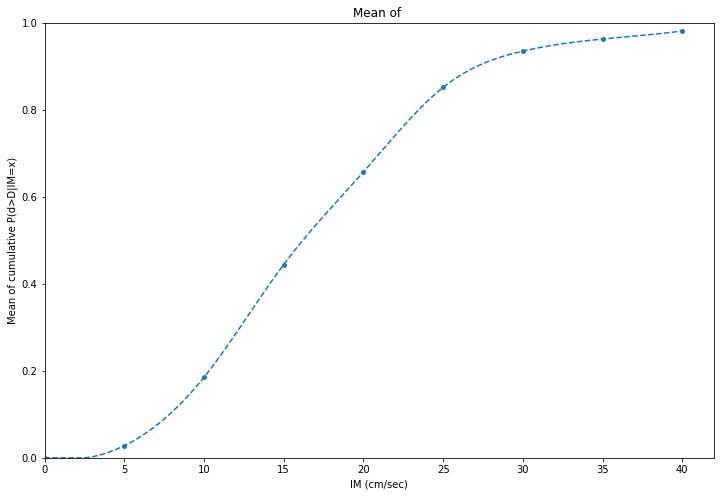

In [6]:
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(12,8))
        # 100 points of x,    interpolation for the curve,                                                              clearing non-zeroes
ax.plot(np.linspace(0,40,100),make_interp_spline(np.arange(0,45,5),np.mean(NLTHA9_pivot,axis=0))(np.linspace(0,40,100)).clip(0),linestyle='--')
ax.scatter(np.arange(0,45,5),np.mean(NLTHA9_pivot,axis=0),s=15)
# do not forget to make the straight line between 0 and 5


ax.set_xlim(0)
ax.set_ylim(0,1)
ax.set_xlabel('IM (cm/sec)')
ax.set_ylabel('Mean of cumulative P(d>D|IM=x)')   ## Mean or median???????????????
ax.set_title('Mean of ') ### Title is not ready

In [26]:

##pivot_numpy = np.concatenate((np.zeros(9)[:, np.newaxis], pivot_numpy), axis=1)
ecu_9_alpha_frag, Vult_9_alpha_frag = zip(*NLTHA9_pivot.index.values)
ecu_9_alpha_frag, Vult_9_alpha_frag = np.asarray(ecu_9_alpha_frag), np.asarray(Vult_9_alpha_frag)

result_9_list = []
theta_9_list = []
beta_9_list = []

IM = np.arange(0,45,5)
fragility_function = []
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []

def frag(thetabeta):
    estimated_fragility = sp.norm.cdf(np.log(factor_list),np.log(thetabeta[0]),thetabeta[1])
    log_likelihood = np.log(sp.binom.pmf(pcllps*nrcrds,nrcrds,estimated_fragility))
    fun = -np.sum(log_likelihood)

    return fun

for i,ecu_i in enumerate(ecu_9_alpha_frag):
    factor_list = np.array([0,5,10,15,20,25,30,35,40])
    pcllps = NLTHA9_pivot.iloc[i]
    nrcrds = 12
    ncllps = pcllps*nrcrds

    # starting guess
    theta, beta = 18,0.4
    
    # Bounds
    bnds = ((2, 100), (0.1, 2))

    thetabeta_start = [theta,beta]
    
    result = spo.minimize(frag,thetabeta_start,options={'disp': True},bounds=bnds)

    if result.success:
        print("Success!", end = '\n')
        miny = result.x
        theta_mxlk = round(miny[0],2)
        beta_mxlk = round(miny[1],2)
        theta_9_list.append(theta_mxlk)
        beta_9_list.append(beta_mxlk)

        z_mxlk = -round(result.fun,2)
        z_list.append(z_mxlk)
        fragility_table.loc[i] = sp.norm.cdf(np.log(IM),np.log(theta_mxlk),beta_mxlk)

theta_9_list = np.array(theta_9_list)
beta_9_list = np.array(beta_9_list)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.scatter(ecu_9_alpha_frag, Vult_9_alpha_frag, theta_list)
%matplotlib inline
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


Success!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encounter

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


This is the 3D plot of fragility outputs for 9 CCM combination of ecu and Vult metavariables

In [29]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

fig = px.scatter_3d([ecu_9_alpha_frag,Vult_9_alpha_frag,theta_9_list])
fig = go.Figure(data=[go.Scatter3d(x=ecu_9_alpha_frag, y=Vult_9_alpha_frag, z=theta_9_list,mode='markers',marker_size=2.5,marker_color='silver')])
fig.update_layout(scene = dict(
                    xaxis_title='alpha_ecu',
                    yaxis_title='alpha_Vult',
                    zaxis_title='theta'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()


In [ ]:
# -*- coding: utf-8 -*-

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_excel('composite_pivottable_t1.xlsx')
# seperate out our x and y values
x_values = df[['ecu_std','Vult_std']].values
y_values = np.log(df[['theta']]).values
print(x_values[0], y_values[0])


poly_model = PolynomialFeatures(degree=3)
poly_x_values = poly_model.fit_transform(x_values)

# should be in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

# let's fit the model
poly_model.fit(poly_x_values, y_values)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
y_pred = regression_model.predict(poly_x_values)
print(regression_model.coef_)
#p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
mean_squared_error(y_values, y_pred, squared=False)



x1_mesh = np.linspace(-1.4142, 1.4142, 50)
x2_mesh = np.linspace(-1.4142, 1.4142, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T
poly_x_mesh = poly_model.fit_transform(x_mesh)
y_mesh = regression_model.predict(poly_x_mesh)


#y_mesh= p00 + p10*x1_mesh + p01*x2_mesh + p20*x1_mesh**2 + p11*x1_mesh*x2_mesh + p02*x2_mesh**2

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')


ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)

ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=70)
ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


######## testing phase ################

## import'ng data
test_data = pd.read_excel('100Analysis_fragility.xlsx')



## cleaning data 
'''
# Detection
# IQR
Q1 = np.percentile(test_data[['theta']], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(test_data[['theta']], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Upper bound
upper = np.where(test_data[['theta']] >= (Q3+0*IQR))[0]
# Lower bound
lower = np.where(test_data[['theta']] <= (Q1-0*IQR))[0]
 
# Removing the Outliers 
test_data[['theta']].drop(upper[0], inplace = True)
test_data[['theta']].drop(lower[0], inplace = True)
'''
## preparing data
test_x = test_data[['ecu_std','Vult_std']].values
test_y = np.log(test_data[['theta']].values)
test_poly_x =  poly_model.fit_transform(test_x)

## prediction and comparison
test_y_pred = regression_model.predict(test_poly_x)
r2 = r2_score(np.exp(test_y), np.exp(test_y_pred))
print(r2)

## graphing residual plot

test_y_residual = (test_y_pred-test_y)


fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')


ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
ax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)
ax.set_zlim(-1,1)

ax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color='black',marker='.',alpha=1,s=70)
ax.scatter(test_x[:,0], test_x[:,1], test_y_residual/test_y,color='black',marker='.',alpha=0.25,s=70)

'''
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
'''

FileNotFoundError: ignored

[-1.5995066   0.16622822] 2.6741486494265287
initial values [-1.5995066   0.16622822]
Mapped to [ 1.         -1.5995066   0.16622822  2.55842136 -0.26588314  0.02763182]
[ 0.          0.1386525   0.28830564  0.02217984  0.09643078 -0.30867449]


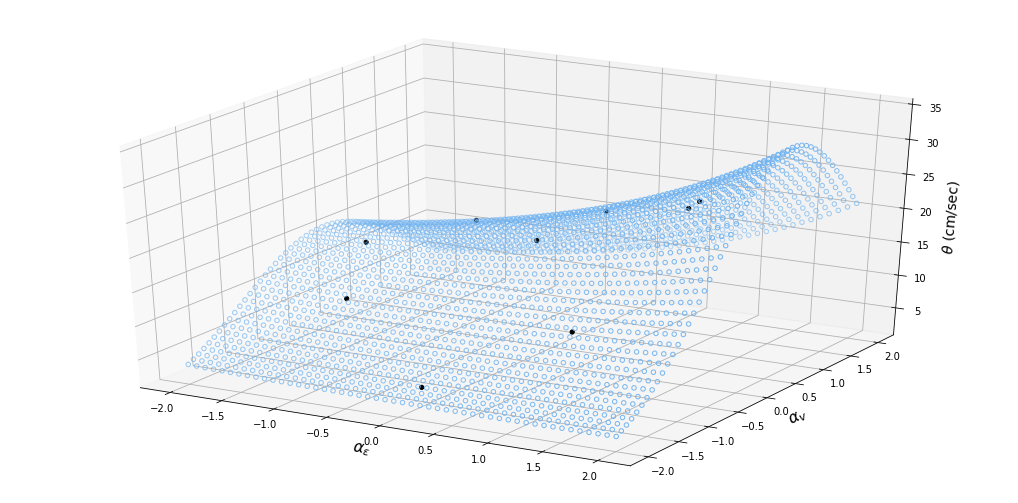

In [32]:
# -*- coding: utf-8 -*-

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# seperate out our x and y values
x_1,x_2 = map(list,zip(*NLTHA9_pivot.index.values))
x_values =np.column_stack((x_1,x_2))
y_values = np.log(theta_9_list)
print(x_values[0], y_values[0])


poly_model = PolynomialFeatures(degree=2)
poly_x_values = poly_model.fit_transform(x_values)

# should be in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

# let's fit the model
poly_model.fit(poly_x_values, y_values)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
y_pred = regression_model.predict(poly_x_values)
print(regression_model.coef_)
#p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
mean_squared_error(y_values, y_pred, squared=False)


x1_mesh = np.linspace(-2, 2, 50)
x2_mesh = np.linspace(-2, 2, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T
poly_x_mesh = poly_model.fit_transform(x_mesh)
y_mesh = regression_model.predict(poly_x_mesh)

fig = plt.figure(figsize =(18, 9))
ax = plt.axes(projection ='3d')


ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)

ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=70)
ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


#ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
#ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
#ax.set_ylabel(r"$\alpha_v$",fontsize=16)

#ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=70)
#ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

